In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('RawData.csv')

In [3]:
data.head()

,Walker,Walking position,Gender expression,Biological Sex,On phone/distracted?,Result,Reaction
0,woman1,R,F,F,Yes,Collision,Y
1,woman1,R,F,F,No,Collision,N
2,woman1,C,F,F,Yes,No Collision,N
3,woman1,R,M,M,No,No Collision,N
4,woman1,R,F,F,No,No Collision,N


In [4]:
pd.DataFrame(data['Walking position'].value_counts().values.reshape(1,3), index=['Counts'], columns=['Right','Center','Left'])

,Right,Center,Left
Counts,22,7,1


In [5]:
pd.DataFrame(data.groupby(['Result','Reaction'])['Reaction'].count())

Reaction
Result       Reaction          
Collision    N                3
             Y                5
No Collision N               21
             Y                1

In [6]:
table = pd.crosstab(data['Gender expression'], data['Result'])
table.index = ['F', 'M']
table.columns = ['Collision', 'No Collision']
table

,Collision,No Collision
F,5,10
M,3,12


In [7]:
prop_table = table.apply(lambda x: x/sum(x),axis=1)
prop_table

,Collision,No Collision
F,0.333333,0.666667
M,0.200000,0.800000


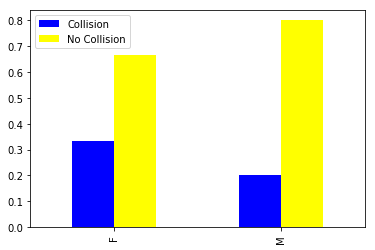

In [8]:
prop_table.plot(kind='bar',color=['blue','yellow'])

##### Hypothesis testing

Let pm = the true proportion of masculine students who collide when a female-identifying student walks directly toward them.
Let pf = the true proportion of feminine students who collide when a female-identifying student walks directly toward them.

- H0: pm – pf = 0
- HA: pm – pf ≠0

In [9]:
pooled_proportion = (5+3)/(15+15)
SE=np.sqrt((pooled_proportion*(1-pooled_proportion)/15) + (pooled_proportion*(1-pooled_proportion)/15))

In [10]:
# Z Score
Z = (-0.13-0)/SE
Z

-0.80507975324865122

In [11]:
p_value = .42
# p value way larger than significance level of 0.05, so we fail to reject the null hypothesis

In [12]:
CI_lower_bound =  -.13-1.96*SE
CI_upper_bound = -.13+1.96*SE

# 95% Confidence Interval
(CI_lower_bound, CI_upper_bound)

(-0.44649038368165778, 0.18649038368165777)